In [1]:
import pandas as pd

# reading the training data
docs = pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv')
docs.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
#find spam and ham rate

spam_rate = docs['label'].value_counts(normalize=True)['spam']
ham_rate = docs['label'].value_counts(normalize=True)['ham']

print(f"Spam rate: {spam_rate:.2%}")
print(f"Ham rate: {ham_rate:.2%}")

Spam rate: 28.99%
Ham rate: 71.01%


In [3]:
#drop first column and label column

docs = docs.drop(['Unnamed: 0', 'label'], axis=1)
docs.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# convert to X and y
X = docs.text
y = docs.label_num
print(X.shape)
print(y.shape)

(5171,)
(5171,)


In [5]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [7]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [8]:
# printing the vocabulary
vect.vocabulary_

{'subject': 36329,
 'hpl': 20554,
 'nom': 27640,
 'january': 22353,
 '2001': 981,
 'attached': 6456,
 'file': 17182,
 'hplnol': 20560,
 '09': 192,
 'xls': 41156,
 'paliourg': 28959,
 'expensive': 16537,
 'charset': 10175,
 'iso': 22136,
 '8859': 3495,
 'ordering': 28526,
 'eds': 15191,
 'simple': 34907,
 'private': 30779,
 'secure': 34180,
 'escription': 16143,
 'required': 32597,
 'solution': 35405,
 'easy': 15059,
 'use': 39087,
 'http': 20633,
 'hung': 20694,
 'amendedl': 5402,
 '196': 947,
 'pill': 29859,
 '36': 1712,
 'unlisting': 38904,
 'soldout': 35377,
 'viagra': 39554,
 '78': 3231,
 'cheap': 10210,
 'cialis': 10507,
 'save': 33820,
 '70': 2968,
 'shipped': 34658,
 'worldwide': 40817,
 'zocor': 41776,
 '89': 3506,
 '00': 0,
 'soma': 35412,
 'lipitor': 24387,
 'levitra': 24198,
 '22': 1091,
 'meridia': 25937,
 'ultram': 38721,
 '11': 323,
 'offer': 28118,
 'buyback': 9102,
 'deals': 13073,
 '2000': 977,
 'current': 12588,
 'aware': 6715,
 'information': 21568,
 'let': 24171,
 '

In [9]:
# vocab size
len(vect.vocabulary_.keys())

41894

In [10]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [11]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 252272 stored elements and shape (3878, 41894)>
  Coords	Values
  (0, 192)	2
  (0, 981)	1
  (0, 6456)	1
  (0, 17182)	1
  (0, 20554)	1
  (0, 20560)	2
  (0, 22353)	1
  (0, 27640)	1
  (0, 36329)	1
  (0, 41156)	2
  (1, 947)	1
  (1, 1712)	1
  (1, 3495)	1
  (1, 5402)	1
  (1, 10175)	1
  (1, 15059)	1
  (1, 15191)	1
  (1, 16143)	1
  (1, 16537)	1
  (1, 20633)	1
  (1, 20694)	1
  (1, 22136)	1
  (1, 28526)	1
  (1, 28959)	2
  (1, 29859)	1
  :	:
  (3877, 323)	2
  (3877, 977)	2
  (3877, 1154)	1
  (3877, 1333)	1
  (3877, 4976)	2
  (3877, 5423)	2
  (3877, 6456)	1
  (3877, 7511)	1
  (3877, 9830)	1
  (3877, 10108)	2
  (3877, 10384)	2
  (3877, 11141)	1
  (3877, 11981)	2
  (3877, 14814)	2
  (3877, 15289)	2
  (3877, 15815)	3
  (3877, 16958)	2
  (3877, 17182)	1
  (3877, 17725)	1
  (3877, 24400)	2
  (3877, 32382)	1
  (3877, 36329)	2
  (3877, 37395)	2
  (3877, 38308)	1
  (3877, 41156)	2


In [12]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [13]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

In [14]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9822119102861562

In [15]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[903,  11],
       [ 12, 367]])

In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[903  11]
 [ 12 367]]


In [17]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9683377308707124


In [18]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9879649890590809


In [19]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9708994708994709
0.9708994708994709


In [20]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9708994708994709
PRECISION SCORE : 0.9708994708994709
RECALL SCORE : 0.9683377308707124
F1 SCORE : 0.9696169088507266


In [21]:
y_pred_class

array([0, 0, 1, ..., 0, 1, 0])

In [22]:
y_pred_proba

array([[1.00000000e+00, 2.01444368e-11],
       [1.00000000e+00, 6.64295640e-84],
       [1.50256840e-60, 1.00000000e+00],
       ...,
       [1.00000000e+00, 3.55124827e-53],
       [4.29303396e-14, 1.00000000e+00],
       [1.00000000e+00, 3.78570278e-41]])

In [23]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [24]:
# area under the curve
print (roc_auc)

0.9964506965814679


In [25]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,inf,0.000000,0.000000
1,1.000000e+00,0.572559,0.003282
2,1.000000e+00,0.575198,0.003282
3,1.000000e+00,0.580475,0.003282
4,1.000000e+00,0.591029,0.003282
...,...,...,...
68,1.299515e-167,1.000000,0.845733
69,4.402936e-286,1.000000,0.928884
70,2.281976e-286,1.000000,0.931072
71,7.410985e-323,1.000000,0.945295


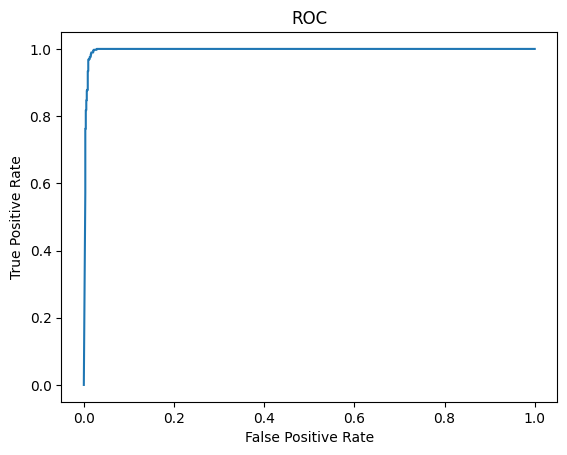

In [26]:
# plotting the ROC curve
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [28]:
# Example new email (replace this with any email text)
new_emails = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize.",
    "Hi, could you please send me the meeting notes from yesterday?"
]

# Transform using the same vectorizer used for training
new_emails_transformed = vect.transform(new_emails)

# Predict class: 1 = spam, 0 = ham
predicted_classes = mnb.predict(new_emails_transformed)

# Predict probability of being spam
predicted_proba = mnb.predict_proba(new_emails_transformed)[:, 1]

# Display results
for i, email in enumerate(new_emails):
    label = "SPAM" if predicted_classes[i] == 1 else "HAM"
    probability = predicted_proba[i]
    print(f"📧 Email: {email[:60]}...")
    print(f"➡ Predicted: {label} (Spam Probability: {probability:.2%})\n")

📧 Email: Congratulations! You've won a free iPhone. Click here to cla...
➡ Predicted: SPAM (Spam Probability: 99.95%)

📧 Email: Hi, could you please send me the meeting notes from yesterda...
➡ Predicted: HAM (Spam Probability: 1.54%)

